In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
zomato = pd.read_csv("D:/DATA_SCIENCE/readmycourse/assignments/pandas_ass/zomato.csv",encoding = "cp1252",usecols=range(17))

D:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
zomato.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [4]:
zomato.drop(['url', 'address', 'phone', 'menu_item'], axis=1, inplace=True)


In [5]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [6]:
zomato.duplicated().sum()


530

In [7]:
zomato.drop_duplicates(inplace=True)


In [8]:
zomato.drop("dish_liked",axis=1,inplace=True)

In [9]:
zomato.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari


In [10]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55720 entries, 0 to 56249
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         55719 non-null  object
 1   online_order                 55717 non-null  object
 2   book_table                   55683 non-null  object
 3   rate                         47921 non-null  object
 4   votes                        55663 non-null  object
 5   location                     55617 non-null  object
 6   rest_type                    55404 non-null  object
 7   cuisines                     55558 non-null  object
 8   approx_cost(for two people)  55255 non-null  object
 9   reviews_list                 55582 non-null  object
 10  listed_in(type)              51275 non-null  object
 11  listed_in(city)              51257 non-null  object
dtypes: object(12)
memory usage: 5.5+ MB


In [11]:
zomato.isnull().sum()

name                              1
online_order                      3
book_table                       37
rate                           7799
votes                            57
location                        103
rest_type                       316
cuisines                        162
approx_cost(for two people)     465
reviews_list                    138
listed_in(type)                4445
listed_in(city)                4463
dtype: int64

In [12]:
na_val=[features for features in zomato.columns if zomato[features].isnull().sum()>1]
for feature in na_val:
    print(feature, np.round(zomato[feature].isnull().mean(), 4),  '%  missing values')

online_order 0.0001 %  missing values
book_table 0.0007 %  missing values
rate 0.14 %  missing values
votes 0.001 %  missing values
location 0.0018 %  missing values
rest_type 0.0057 %  missing values
cuisines 0.0029 %  missing values
approx_cost(for two people) 0.0083 %  missing values
reviews_list 0.0025 %  missing values
listed_in(type) 0.0798 %  missing values
listed_in(city) 0.0801 %  missing values


In [13]:
zomato.dropna(how='any',inplace=True)

In [14]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43121 entries, 0 to 56249
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43121 non-null  object
 1   online_order                 43121 non-null  object
 2   book_table                   43121 non-null  object
 3   rate                         43121 non-null  object
 4   votes                        43121 non-null  object
 5   location                     43121 non-null  object
 6   rest_type                    43121 non-null  object
 7   cuisines                     43121 non-null  object
 8   approx_cost(for two people)  43121 non-null  object
 9   reviews_list                 43121 non-null  object
 10  listed_in(type)              43121 non-null  object
 11  listed_in(city)              43121 non-null  object
dtypes: object(12)
memory usage: 4.3+ MB


In [15]:
zomato= zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                         'listed_in(city)':'city'})

In [16]:
zomato.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari


In [17]:
zomato.describe(include = "all")

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
count,43121,43121,43121,43121,43121,43121,43121,43121,43121,43121,43121,43121
unique,9975,2528,2806,2795,4568,2865,2886,5185,2838,20049,2759,2822
top,('Rated 4.0',Yes,No,NEW,0,BTM,Quick Bites,North Indian,300,[],Delivery,BTM
freq,283,25582,34607,2182,2261,4030,14432,2040,5516,2301,20015,2531


In [18]:
zomato['online_order']=zomato['online_order'].apply(lambda x: '1' if str(x)=='Yes' else '0')
zomato['online_order'] = zomato['online_order'].astype(int)

In [19]:
zomato['book_table']=zomato['book_table'].apply(lambda x: '1' if str(x)=='Yes' else '0')
zomato['book_table'] = zomato['book_table'].astype(int)

In [20]:
zomato['online_order'].unique()

array([1, 0])

In [21]:
zomato['book_table'].unique()

array([1, 0])

In [22]:
zomato.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [23]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43121 entries, 0 to 56249
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          43121 non-null  object
 1   online_order  43121 non-null  int32 
 2   book_table    43121 non-null  int32 
 3   rate          43121 non-null  object
 4   votes         43121 non-null  object
 5   location      43121 non-null  object
 6   rest_type     43121 non-null  object
 7   cuisines      43121 non-null  object
 8   cost          43121 non-null  object
 9   reviews_list  43121 non-null  object
 10  type          43121 non-null  object
 11  city          43121 non-null  object
dtypes: int32(2), object(10)
memory usage: 3.9+ MB


In [24]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], dtype=object)

In [25]:
R=["0","1","2","3","4","5"]
a=[]
for i in zomato["rate"]:
    if i [0] in R:
        a.append(i)
    else:
        a.append("0.0")

In [26]:
zomato["rating1"] = a

In [27]:
zomato['rating1'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '0.0', '4.2/5',
       '4.0/5', '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5',
       '4.3/5', '3.5/5', '4.4/5', '2.6/5', '3.8 /5', '3.4/5', '2.9/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.2/5', '2.3/5', '2.4/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '2.9 /5', '4.3 /5',
       '4.4 /5', '2.1/5', '4.9/5', '2.0/5', '4.5 /5',
       '13 & 14th. SO I ordered online and total bill amount displayed in Zomato as 446/- after 109 discount',
       '4.6 /5', '3.0 /5', '2.4 /5', '4.8 /5', '4.7 /5', '2.3 /5',
       '4.9 /5', '2.2 /5', '2.0 /5',
       "1 is wid ac and other is at roof top open place...food ws also great...i must say tht my experience with this place was pretty good..staff was also very humble\\nHighly recommended\\nWhat we ordered????\\nSignature whisky(on the rocks)\\nRed wi

In [28]:
zomato["rating2"] = zomato["rating1"].str[:3]

In [29]:
zomato["rating2"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '0.0', '4.2', '4.0', '3.9',
       '3.1', '3.0', '3.2', '3.3', '2.8', '4.3', '3.5', '4.4', '2.6',
       '3.4', '2.9', '4.5', '2.5', '2.7', '4.7', '2.2', '2.3', '2.4',
       '4.8', '2.1', '4.9', '2.0', '13 ', '1 i'], dtype=object)

In [30]:
zomato.drop({'rating1','rate'},axis=1,inplace=True)

In [31]:
remove_13 = lambda x: x.replace('13 ', '0.0')
remove_i = lambda x: x.replace('1 i','0.0')

In [32]:
zomato.rating2 = zomato.rating2.apply(remove_13)
zomato.rating2 = zomato.rating2.apply(remove_i)

In [33]:
zomato['rating2'] = zomato['rating2'].astype(float)

In [34]:
zomato["rating2"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 0. , 4.2, 4. , 3.9, 3.1, 3. , 3.2, 3.3,
       2.8, 4.3, 3.5, 4.4, 2.6, 3.4, 2.9, 4.5, 2.5, 2.7, 4.7, 2.2, 2.3,
       2.4, 4.8, 2.1, 4.9, 2. ])

In [35]:
zc=zomato['cost'].value_counts()
zc

300                                                                                                                                                                                                                                                                                                                                                                                 5516
400                                                                                                                                                                                                                                                                                                                                                                                 5266
500                                                                                                                                                                                                                                                   

In [36]:
zomato['cost'] = zomato['cost'].astype(str)

In [37]:
a=[]
for i in zomato["cost"]:
    if i[0].isdigit():
        a.append(i)
    else:
        a.append("00")
zomato['cost1'] = a

In [38]:
zomato['cost1'].unique()

array(['800', '300', '600', '00', '550', '500', '450', '650', '700+',
       '400', '900', '200', '750', '150', '850', '100', '1,200', '350',
       '250', '950', '10,00', '12,00', '1500+', '1,300', '350+', '1,000',
       '199', '80', '1,100', '160', '1,600', '700', '1,500', '230', '130',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '3,000', '2,800', '3,400', '50', '40',
       '2,100', '1,250', '3,500', '4,000', '2,400', '2,600', '28,00',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '2,700', '4,500',
       '1,650'], dtype=object)

In [39]:
zomato['cost1']= zomato['cost1'].apply(lambda x: x.replace(',',''))
zomato['cost1']= zomato['cost1'].apply(lambda x: x.replace('+',''))
zomato['cost1'] = zomato['cost1'].astype(int)

In [40]:
zomato['cost1'].unique()

array([ 800,  300,  600,    0,  550,  500,  450,  650,  700,  400,  900,
        200,  750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500,
       1300,  199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350,
       2200, 2000, 1800, 1900,  180,  330, 2500, 3000, 2800, 3400,   50,
         40, 2100, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,
        240,  360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 2700, 4500,
       1650])

In [41]:
zomato['votes'].value_counts()

0                                                                                                                                                                                                               2261
4                                                                                                                                                                                                               1114
6                                                                                                                                                                                                                974
7                                                                                                                                                                                                                852
9                                                                                                                                                   

In [42]:
zomato['votes'] = zomato['votes'].astype(str)

In [43]:
a=[]
for i in zomato["votes"]:
    if i[:3].isdigit():
        a.append(i)
    else:
        a.append("0")
zomato['vote'] = a
zomato['vote'] = zomato['vote'].apply(lambda x: x.replace(',',''))
zomato['vote'] = zomato['vote'].astype(int)
zomato.drop('votes',axis=1,inplace = True)

In [44]:
zomato['vote'].value_counts()

0       6226
4       1119
6        978
7        857
9        735
        ... 
1940       1
1876       1
1460       1
4650       1
1533       1
Name: vote, Length: 1763, dtype: int64

In [45]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43121 entries, 0 to 56249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43121 non-null  object 
 1   online_order  43121 non-null  int32  
 2   book_table    43121 non-null  int32  
 3   location      43121 non-null  object 
 4   rest_type     43121 non-null  object 
 5   cuisines      43121 non-null  object 
 6   cost          43121 non-null  object 
 7   reviews_list  43121 non-null  object 
 8   type          43121 non-null  object 
 9   city          43121 non-null  object 
 10  rating2       43121 non-null  float64
 11  cost1         43121 non-null  int32  
 12  vote          43121 non-null  int32  
dtypes: float64(1), int32(4), object(8)
memory usage: 3.9+ MB


In [46]:
zomato.head(10)

,name,online_order,book_table,location,rest_type,cuisines,cost,reviews_list,type,city,rating2,cost1,vote
0,Jalsa,1,1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,800,775
1,Spice Elephant,1,0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,800,787
2,San Churro Cafe,1,0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,800,918
3,Addhuri Udupi Bhojana,0,0,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,300,88
4,Grand Village,0,0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,600,166
5,Timepass Dinner,1,0,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari,3.8,600,286
6,Rosewood International Hotel - Bar & Restaurant,0,0,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari,3.6,800,8
7,Onesta,1,1,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari,4.6,600,2556
9,service was sluggish as they took too long to...,0,0,a nice place to give a try.'),('Rated 1.0',we had nachos cheese salsa which was okay. We...,it turned out worse than the garlic bread. Th...,('Rated 3.0',parking facility I could not locate. Staff ca...,it was little difficult to converse. Overall ...,0.0,0,0
10,Smacznego,1,0,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes,Banashankari,4.2,550,504


In [47]:
zomato['name'].value_counts()[:50]

 ('Rated 4.0'                  283
 ('Rated 5.0'                  213
 ('Rated 3.0'                  108
Cafe Coffee Day                 87
Kanti Sweets                    67
Five Star Chicken               67
Just Bake                       65
Petoo                           64
Polar Bear                      61
Baskin Robbins                  60
Beijing Bites                   60
McDonald's                      59
Pizza Hut                       58
Subway                          58
Sweet Truth                     58
KFC                             58
Domino's Pizza                  57
Burger King                     55
Corner House Ice Cream          52
Smoor                           52
Ambur Hot Dum Biryani           51
Frozen Bottle                   51
 ('Rated 1.0'                   51
Empire Restaurant               50
Chung Wah                       50
Lassi Shop                      49
A2B - Adyar Ananda Bhavan       49
Keventers                       48
California Burrito  

In [48]:
zomato['location'].value_counts()

BTM                                                                                                                                                                                                              4030
HSR                                                                                                                                                                                                              1920
Koramangala 5th Block                                                                                                                                                                                            1850
JP Nagar                                                                                                                                                                                                         1684
Indiranagar                                                                                                                                     

In [49]:
zomato.head(20)

,name,online_order,book_table,location,rest_type,cuisines,cost,reviews_list,type,city,rating2,cost1,vote
0,Jalsa,1,1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,800,775
1,Spice Elephant,1,0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,800,787
2,San Churro Cafe,1,0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,800,918
3,Addhuri Udupi Bhojana,0,0,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,300,88
4,Grand Village,0,0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,600,166
5,Timepass Dinner,1,0,Basavanagudi,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari,3.8,600,286
6,Rosewood International Hotel - Bar & Restaurant,0,0,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari,3.6,800,8
7,Onesta,1,1,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari,4.6,600,2556
9,service was sluggish as they took too long to...,0,0,a nice place to give a try.'),('Rated 1.0',we had nachos cheese salsa which was okay. We...,it turned out worse than the garlic bread. Th...,('Rated 3.0',parking facility I could not locate. Staff ca...,it was little difficult to converse. Overall ...,0.0,0,0
10,Smacznego,1,0,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes,Banashankari,4.2,550,504


In [50]:
from tqdm import tqdm

In [51]:
zomato['reviews_list'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [52]:
all_ratings = []

for i in tqdm(zomato['reviews_list']):
    i = eval(i)
    
    for score, doc in i:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            
            score = float(score)
            all_ratings.append([score, doc])


  0%|                                                                              | 8/43121 [00:00<00:21, 2001.22it/s]


SyntaxError: unexpected EOF while parsing (<string>, line 1)

In [53]:
ratingdf = pd.DataFrame(all_ratings, columns=['score', 'doc'])
ratingdf

,score,doc
0,4.0,A beautiful place to dine in.The interiors tak...
1,4.0,I was here for dinner with my family on a week...
2,2.0,Its a restaurant near to Banashankari BDA. Me ...
3,4.0,We went here on a weekend and one of us had th...
4,5.0,The best thing about the place is itÃƒÂƒÃƒÂ‚...
...,...,...
126,4.0,Food quality 4.5/5\nHospitality 4/5\nManagemen...
127,4.0,Taste of the food is good and the ambience as ...
128,5.0,"Visited last Saturday with my kids ,\nIt was s..."
129,3.0,I love onesta always and their unlimited offer...


In [54]:
docs = []
for doc in ratingdf['doc'][:150]:
    if '/' in doc:
        print(doc)
        docs.append(doc)

Great food and pleasant ambience. Expensive but Coll place to chill and relax......

Service is really very very good and friendly staff...

Food : 5/5
Service : 5/5
Ambience :5/5
Overall :5/5
I was looking for a quite place to spend some time with family and as well wanted to try some new place. Since I was at Banashankari I thought of trying this place. The place had good rating and was part of Zomato gold. So I decided to try this place. It was a delite to see a very friendly staff and food we ordered was very tasty as well.

Food : 4/5
Ambience :3/5
Friendly staff : 4/5
Pocket friendly : 4/5

Will definitely visit again ??
Food: 8/10
Ambience:8/10
Staff:8/10
One of the good places to try north Indian food...but depends on ur taste buds. Not everyone will like all the items here. Specially when u r particular abt sweet and spicy food.
There's buffet available too.
We had ordered paneer uttar dakshin and paneer kurchan..was amazing. The Gobi hara pyaz and mix veg were average.
One of

In [55]:
print(len(docs))

24


In [56]:
for i in docs:
    x = re.findall('[0-9.]*[0-9]/[0-9]*[0-9]', i)
    print(x)

['5/5', '5/5', '5/5', '5/5']
['4/5', '3/5', '4/5', '4/5']
['8/10', '8/10', '8/10']
['6/10', '7/10', '8/10', '7.5/10']
[]
[]
[]
[]
['4/5', '3.5/5', '4/5', '4/5']
['3/5', '3/5', '3/5']
['10/10', '10/10', '10/10', '25/10']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4.5/5', '4/5', '4.5/5', '4.5/5']


In [57]:
doc = docs[0]
subbed_doc = re.sub('[0-9.]*[0-9]/[0-9]*[0-9]', 'score', doc)
print("ORIGINAL:")
print(doc)
print("\nSUBBED:")
print(subbed_doc)

ORIGINAL:
Great food and pleasant ambience. Expensive but Coll place to chill and relax......

Service is really very very good and friendly staff...

Food : 5/5
Service : 5/5
Ambience :5/5
Overall :5/5

SUBBED:
Great food and pleasant ambience. Expensive but Coll place to chill and relax......

Service is really very very good and friendly staff...

Food : score
Service : score
Ambience :score
Overall :score


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants delivering online or Not')

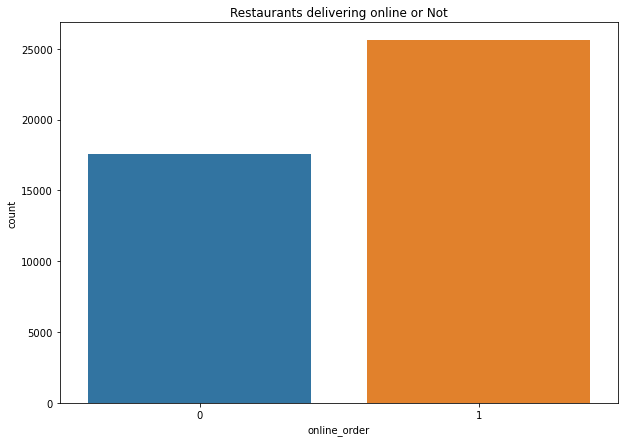

In [58]:
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.title('Restaurants delivering online or Not')

Text(0.5, 0, 'Number of outlets')

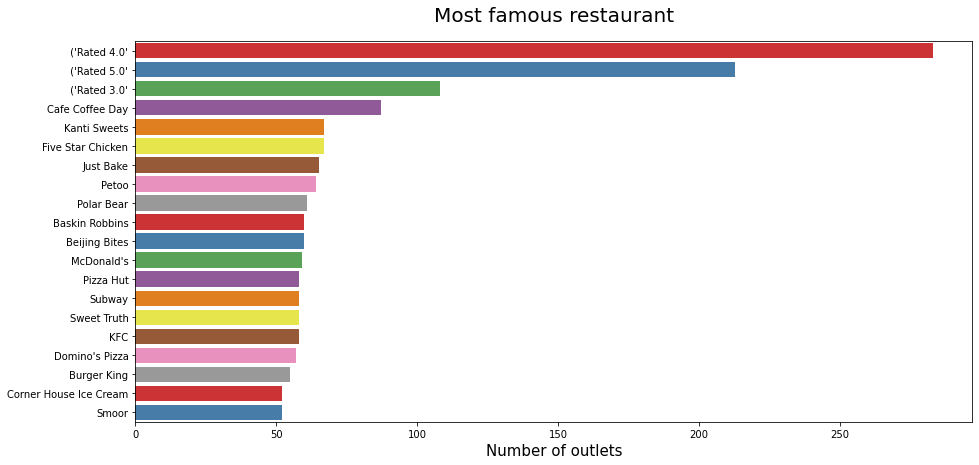

In [59]:
plt.figure(figsize=(15,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants allowing table booking or not')

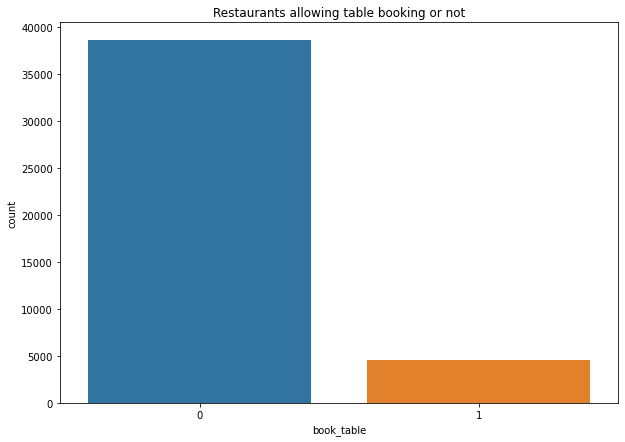

In [60]:
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.title('Restaurants allowing table booking or not')